In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *

import celerite
from celerite import terms
from scipy.optimize import minimize
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle
from datetime import timedelta, date
from datetime import datetime
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [2]:
# def GP(t, y, yerr, Q):
#     S0 = np.var(y) / (w0 * Q)
#     bounds = dict(log_S0=(-15, 15), log_Q=(-15, 15), log_omega0=(np.log(2*np.pi/7), np.log(2*np.pi/3)))
#     kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0), bounds=bounds)
#     # kernel.freeze_parameter("log_omega0")
#     # kernel.freeze_parameter("log_Q")

#     gp = celerite.GP(kernel, mean=np.mean(y))
#     gp.compute(t, yerr)  # You always need to call compute once.

#     initial_params = gp.get_parameter_vector()
#     bounds = gp.get_parameter_bounds()

#     r = minimize(neg_log_like, initial_params, method="L-BFGS-B", bounds=bounds, args=(y, gp))
#     gp.set_parameter_vector(r.x)
    
#     return gp

### 1 mode

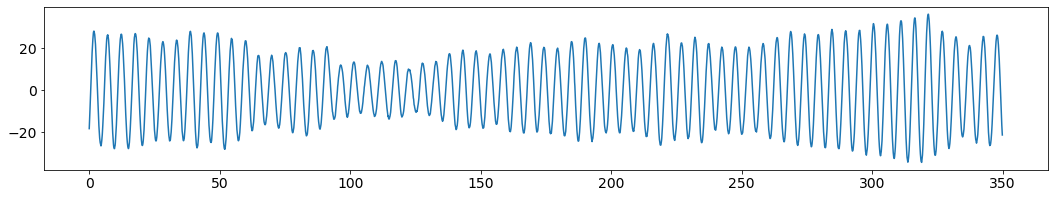

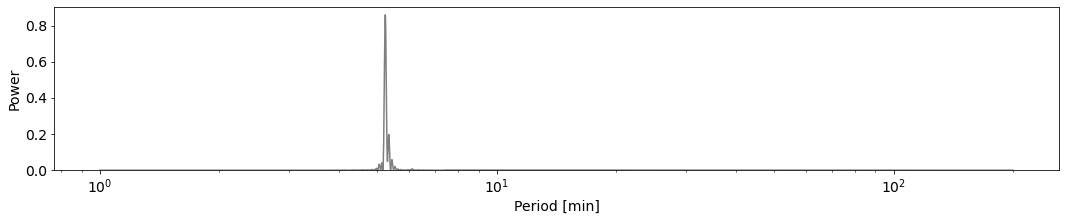

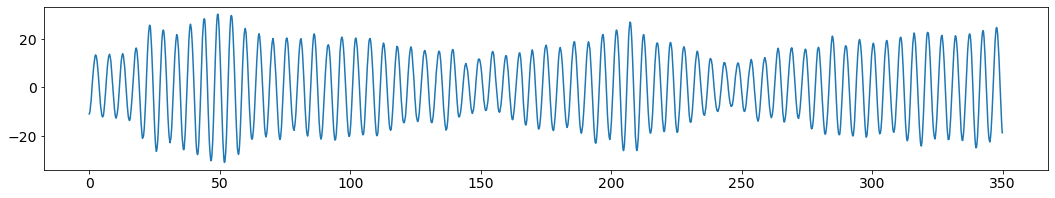

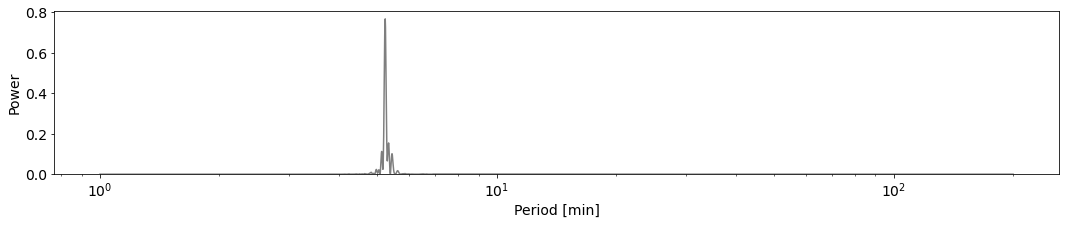

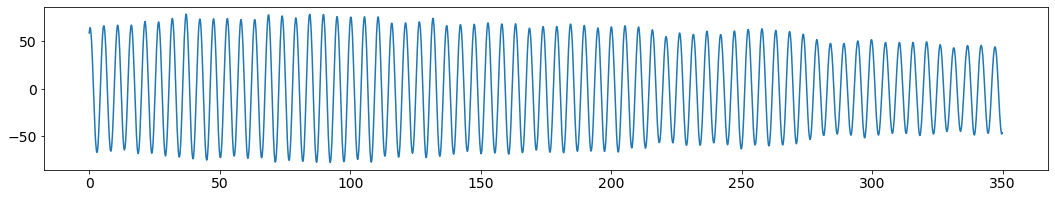

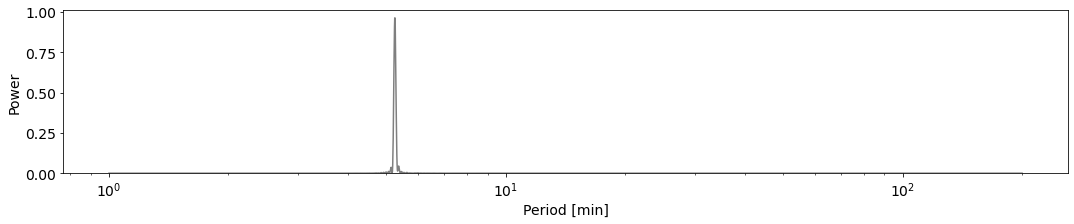

In [4]:
S0 = 1
Q = 500
w0 = 1.194540843699886
N = 3500

t = np.arange(N)/10
yerr = np.random.uniform(0.05, 0.25, N)

kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0))
gp = celerite.GP(kernel)
gp.compute(t, yerr)

plt.rcParams.update({'font.size': 14})

for i in range(3):
    fig = plt.figure(figsize=(18, 3))
    y = gp.sample()
    plt.plot(t, y)
    plt.show()

    frequency, power = LombScargle(t, y).autopower(maximum_frequency=1, samples_per_peak=10)        
    plot_x = 1/frequency
    idx = (plot_x<200) 

    # Periodogram
    fig = plt.figure(figsize=(18, 3))
    plt.plot(plot_x[idx], power[idx], 'k', alpha=0.5)
    plt.ylim(bottom=0, top=max(power[idx])*1.05)    
    plt.ylabel('Power')
    plt.xlabel('Period [min]')
    plt.xscale('log')
    plt.show()     

### 2 modes

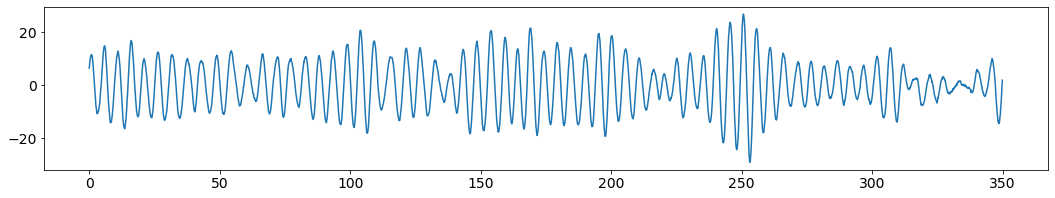

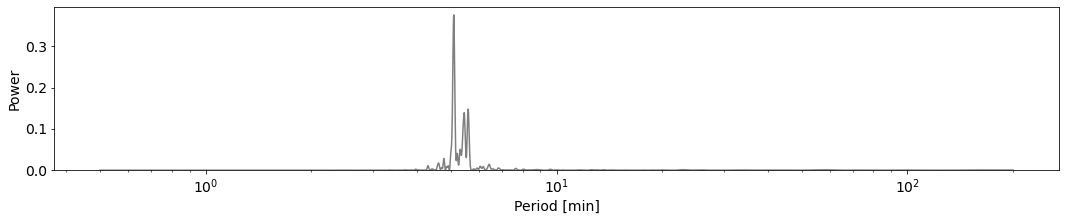

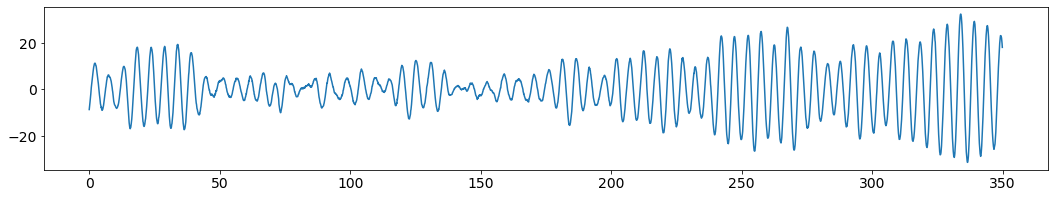

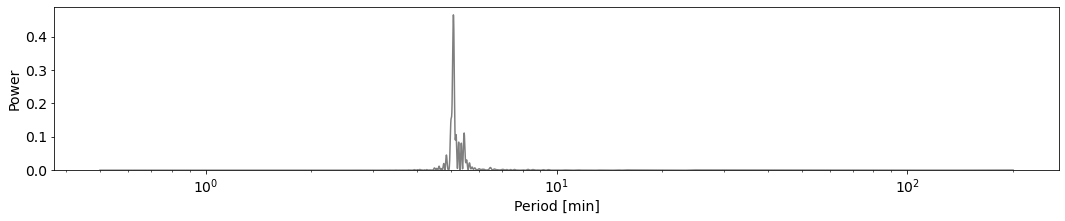

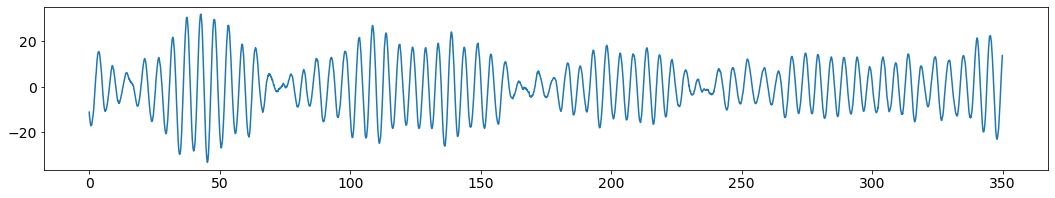

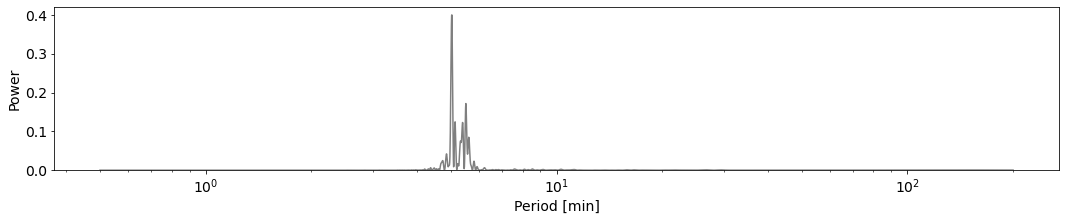

In [4]:

k1 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(2*np.pi/(1/3033.754e-6/60)))
k2 = terms.SHOTerm(log_S0=np.log(S0)+0.1, log_Q=np.log(Q), log_omega0=np.log(2*np.pi/(1/3303.520e-6/60)))   
kernel = k1 + k2
gp = celerite.GP(kernel)
gp.compute(t, yerr)

plt.rcParams.update({'font.size': 14})

for i in range(3):
    fig = plt.figure(figsize=(18, 3))
    y = gp.sample()
    plt.plot(t, y)
    plt.show()    
    
    frequency, power = LombScargle(t, y).autopower(maximum_frequency=2, samples_per_peak=10)        
    plot_x = 1/frequency
    # idx = (plot_x<6) & (plot_x>4.5)
    idx = (plot_x<200) 

    # Periodogram
    fig = plt.figure(figsize=(18, 3))
    plt.plot(plot_x[idx], power[idx], 'k', alpha=0.5)
    plt.ylim(bottom=0, top=max(power[idx])*1.05)    
    plt.ylabel('Power')
    plt.xlabel('Period [min]')
    plt.xscale('log')
    plt.show()        

Beats frequency (in minutes)

In [5]:
1/3033.754e-6/60, 1/3303.520e-6/60, 1/abs(3033.754e-6 - 3303.520e-6)/60  

(5.493743614896483, 5.045123585347347, 61.78193940921642)

### 3 modes 

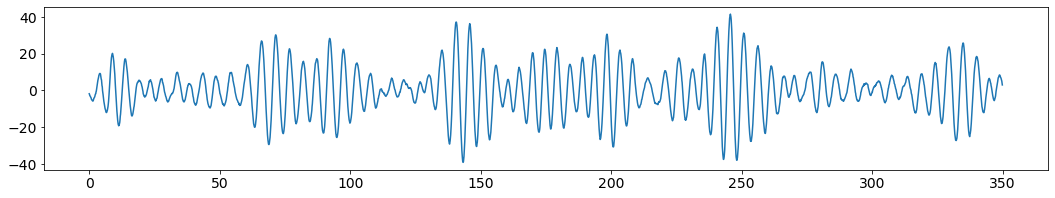

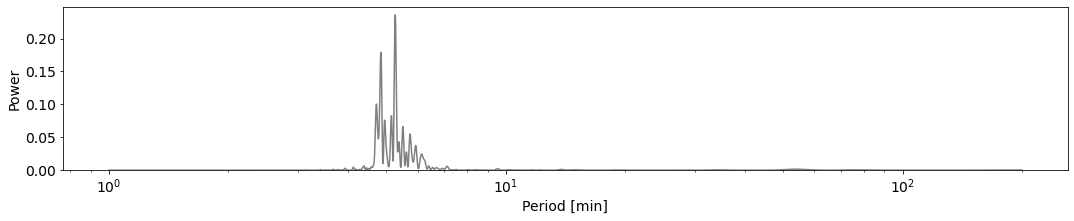

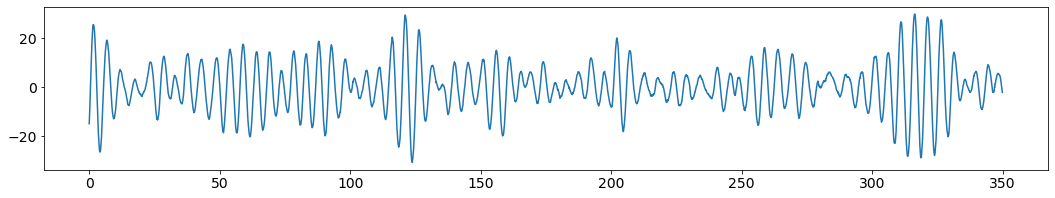

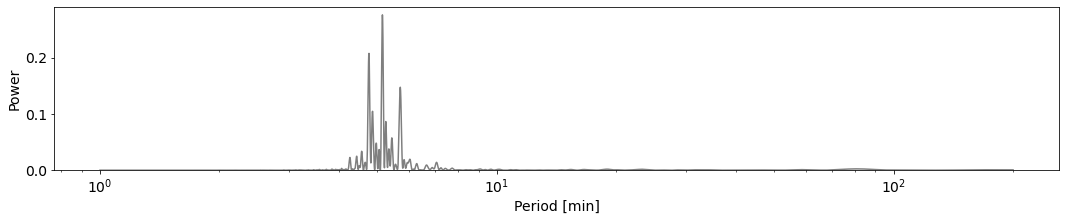

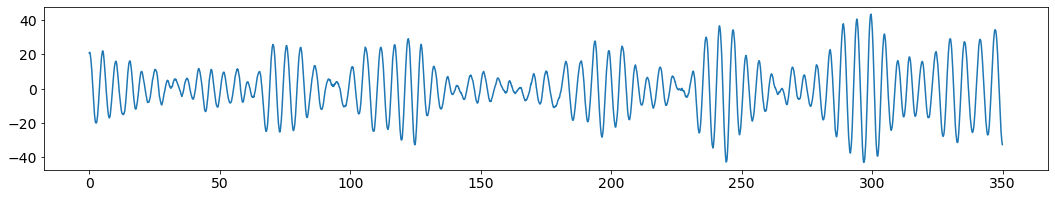

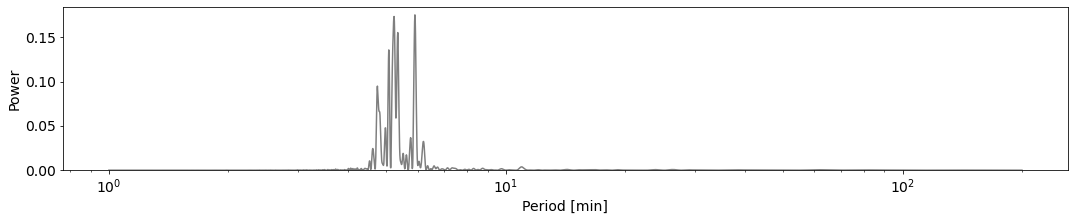

In [6]:
k1 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0))
k2 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0*0.9))  
k3 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0*1.1))
kernel = k1 + k2 + k3
gp = celerite.GP(kernel)
gp.compute(t, yerr)

plt.rcParams.update({'font.size': 14})

for i in range(3):
    fig = plt.figure(figsize=(18, 3))
    y = gp.sample()
    plt.plot(t, y)
    plt.show()    
    
    frequency, power = LombScargle(t, y).autopower(maximum_frequency=1, samples_per_peak=10)        
    plot_x = 1/frequency
    idx = (plot_x<200) 

    # Periodogram
    fig = plt.figure(figsize=(18, 3))
    plt.plot(plot_x[idx], power[idx], 'k', alpha=0.5)
    plt.ylim(bottom=0, top=max(power[idx])*1.05)    
    plt.ylabel('Power')
    plt.xlabel('Period [min]')
    plt.xscale('log')
    plt.show()     

### 4 modes 

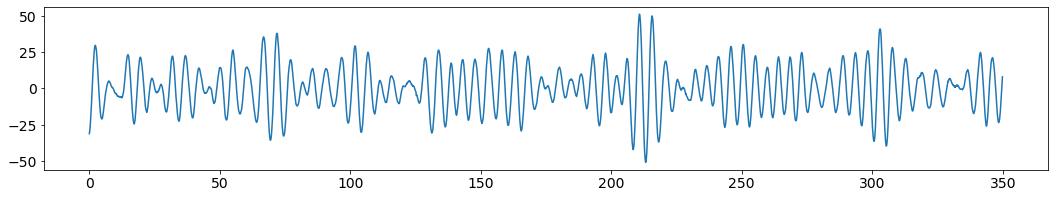

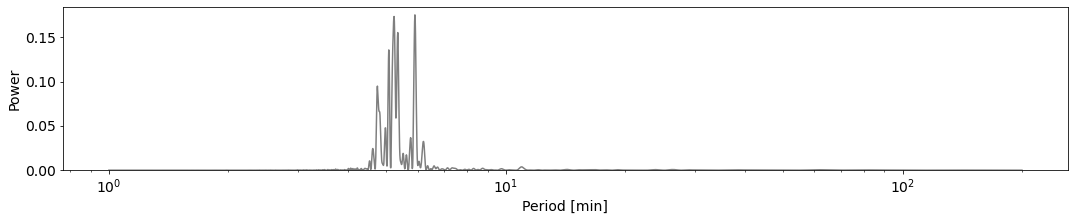

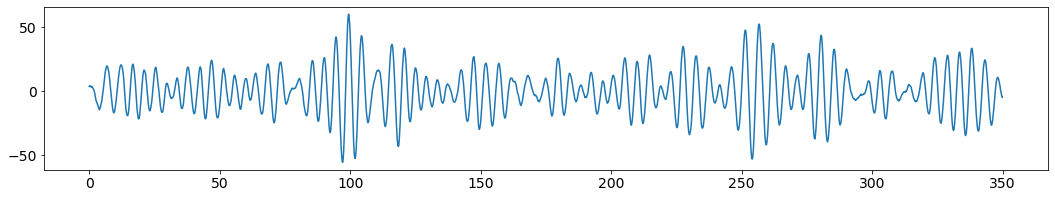

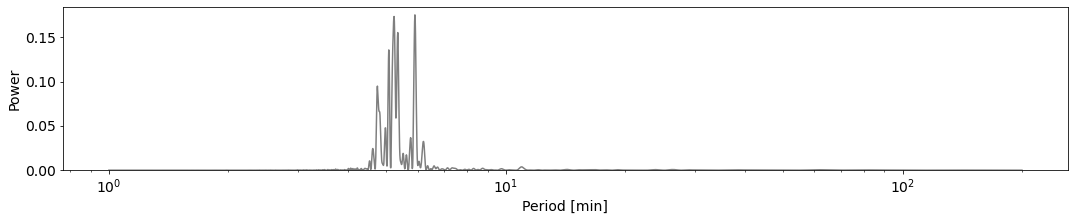

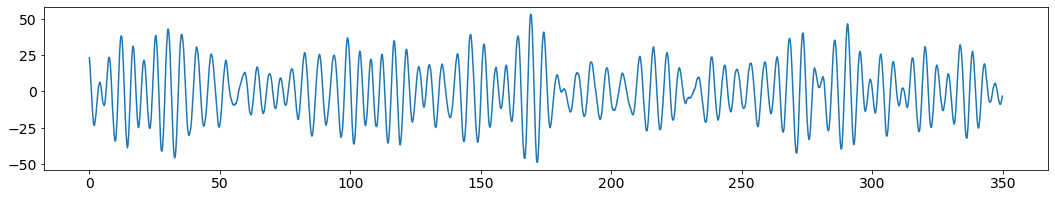

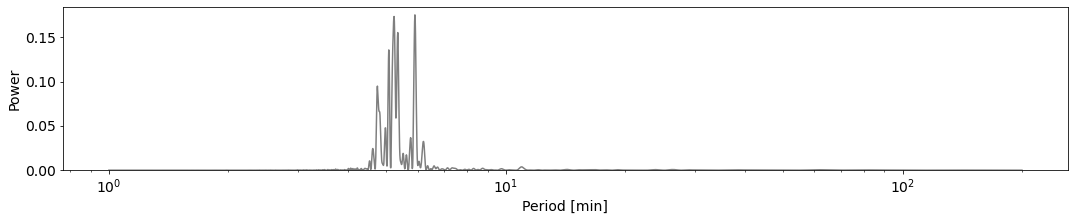

In [7]:
k1 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0))
k2 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0*0.9))  
k3 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0*1.1))
k4 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0*1.2))
kernel = k1 + k2 + k3 + k4
gp = celerite.GP(kernel)
gp.compute(t, yerr)

plt.rcParams.update({'font.size': 14})

for i in range(3):
    fig = plt.figure(figsize=(18, 3))
    y = gp.sample()
    plt.plot(t, y)
    plt.show()    
    
    # Periodogram
    fig = plt.figure(figsize=(18, 3))
    plt.plot(plot_x[idx], power[idx], 'k', alpha=0.5)
    plt.ylim(bottom=0, top=max(power[idx])*1.05)    
    plt.ylabel('Power')
    plt.xlabel('Period [min]')
    plt.xscale('log')
    plt.show()         

# Test: Multiplication of kernels 

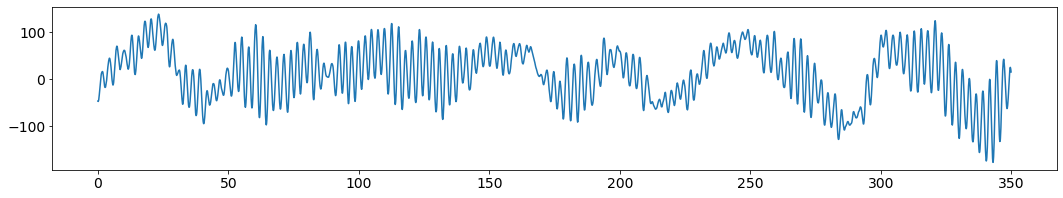

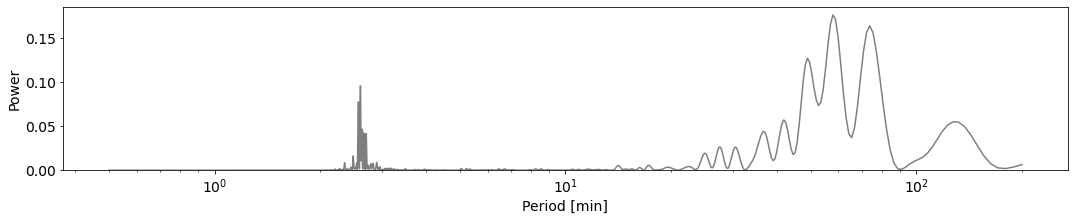

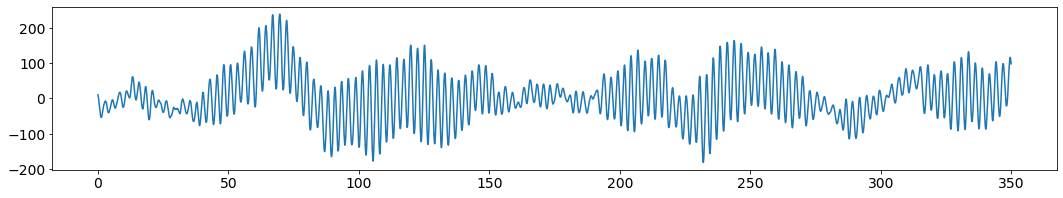

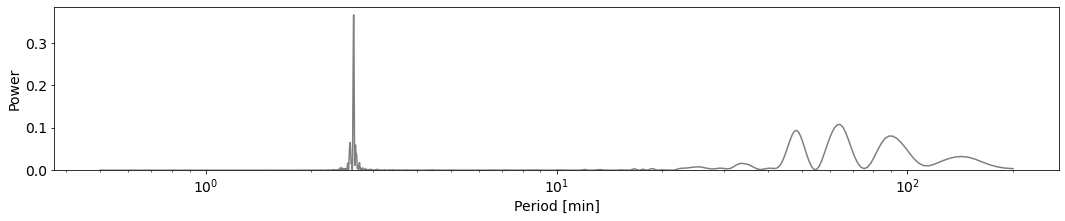

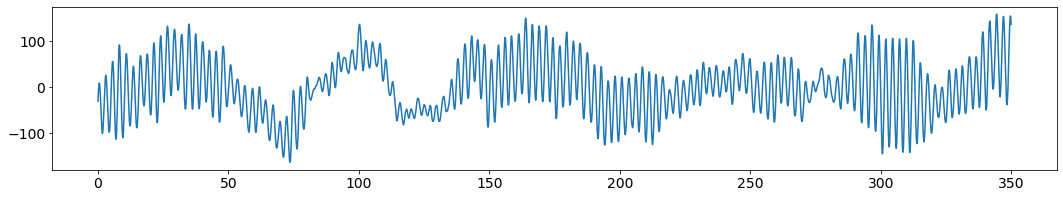

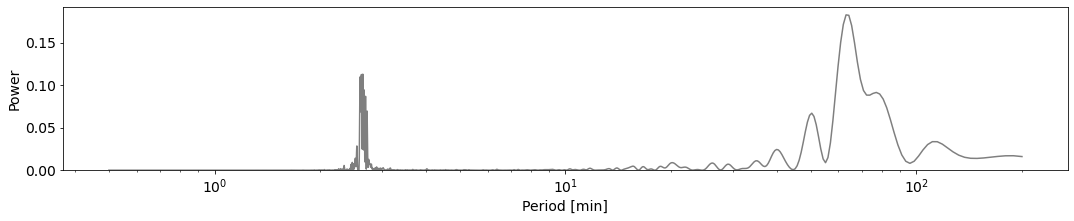

In [8]:

k1 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(2*np.pi/(1/3033.754e-6/60)))
k2 = terms.SHOTerm(log_S0=np.log(S0)+0.1, log_Q=np.log(Q), log_omega0=np.log(2*np.pi/(1/3303.520e-6/60)))   
kernel = k1 * k2
gp = celerite.GP(kernel)
gp.compute(t, yerr)

plt.rcParams.update({'font.size': 14})

for i in range(3):
    fig = plt.figure(figsize=(18, 3))
    y = gp.sample()
    plt.plot(t, y)
    plt.show()    
    
    frequency, power = LombScargle(t, y).autopower(maximum_frequency=2, samples_per_peak=10)        
    plot_x = 1/frequency
    # idx = (plot_x<6) & (plot_x>4.5)
    idx = (plot_x<200) 

    # Periodogram
    fig = plt.figure(figsize=(18, 3))
    plt.plot(plot_x[idx], power[idx], 'k', alpha=0.5)
    plt.ylim(bottom=0, top=max(power[idx])*1.05)    
    plt.ylabel('Power')
    plt.xlabel('Period [min]')
    plt.xscale('log')
    plt.show()        

If it were the superposition of two different frequencies, the periods of the two waves and the beats period are

In [9]:
1/3033.754e-6/60, 1/3303.520e-6/60, 1/abs(3033.754e-6 - 3303.520e-6)/60  

(5.493743614896483, 5.045123585347347, 61.78193940921642)

# Can periodogram detect the beats frequency? -- No

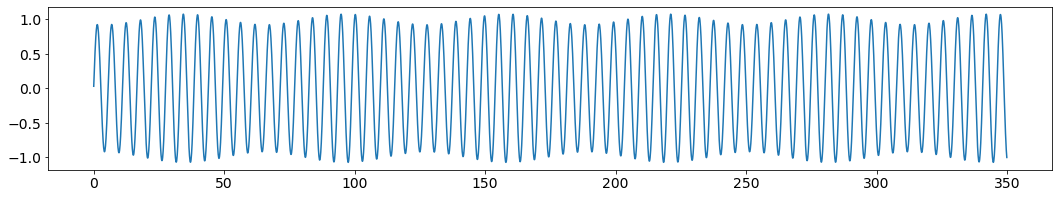

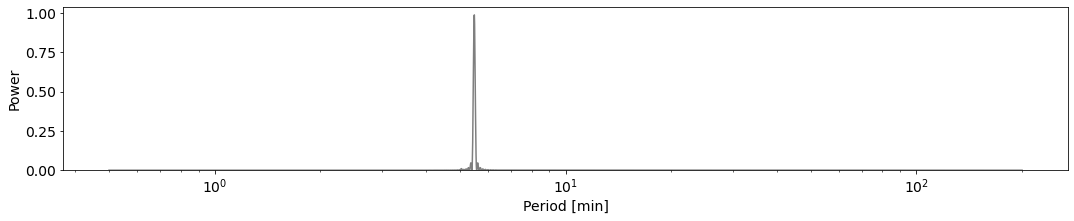

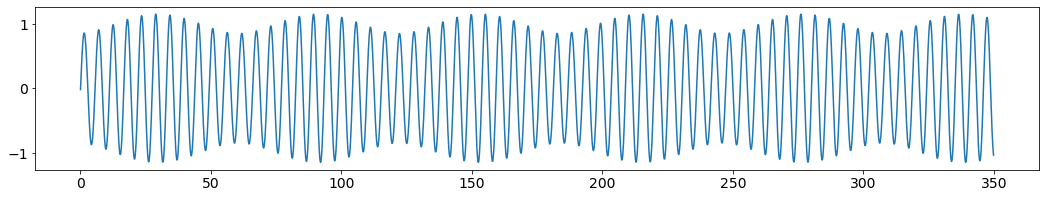

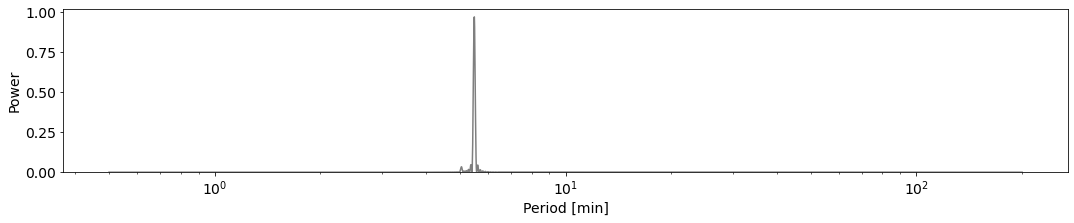

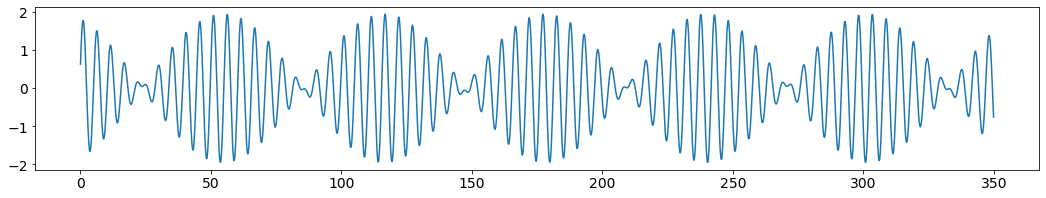

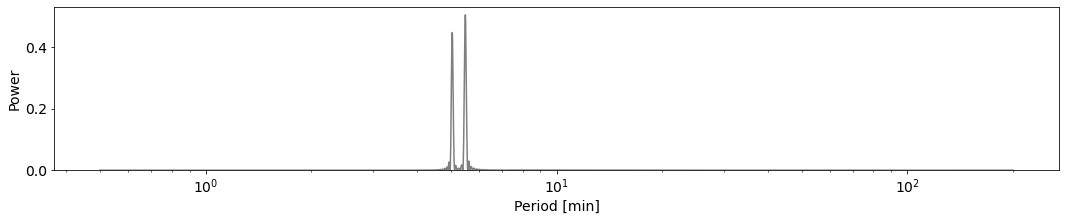

In [41]:
import random



plt.rcParams.update({'font.size': 14})

for i in range(3):
    y1 = np.sin(2*np.pi*3033.754e-6*(t*60))
    y2 = np.random.rand() * np.sin(2*np.pi*3303.520e-6*(t*60) + 2*np.pi*np.random.rand())
    y = y1 + y2
    
    fig = plt.figure(figsize=(18, 3))
    plt.plot(t, y)
    plt.show()
    
    frequency, power = LombScargle(t, y).autopower(maximum_frequency=2, samples_per_peak=10)        
    plot_x = 1/frequency
    idx = (plot_x<200) 

    # Periodogram
    fig = plt.figure(figsize=(18, 3))
    plt.plot(plot_x[idx], power[idx], 'k', alpha=0.5)
    plt.ylim(bottom=0, top=max(power[idx])*1.05)    
    plt.ylabel('Power')
    plt.xlabel('Period [min]')
    plt.xscale('log')
    plt.show()     

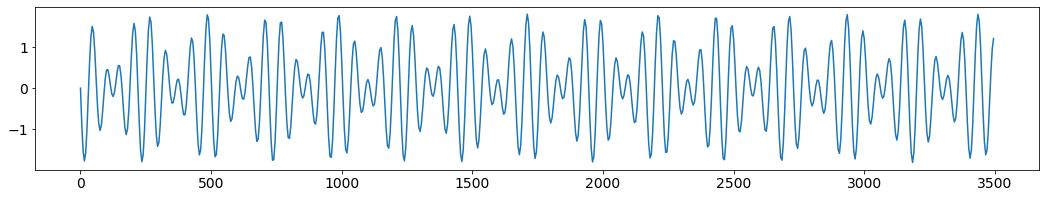

In [120]:
from NEID_solar_functions import *

freq1 = 3033.754e-6
freq2 = freq1 + 68e-6
# freq2 = 3303.520e-6

def y(t):
    y1 = np.sin(2*np.pi*freq1*(t*60))
    y2 = 0.8 * np.sin(2*np.pi*freq2*(t*60))    
    return y1+y2

N = 700
t = np.arange(N)*5

fig = plt.figure(figsize=(18, 3))
plt.plot(t, y(t))



In [121]:
Delta_t = np.linspace(0, 1200, 5*len(t))
cov_XY = []
for delta_t in Delta_t:
    X = y(t[t<(max(t)-delta_t)])
    Y = y(t[t<(max(t)-delta_t)]+delta_t)
    cov_XY.append(cov(X, Y))
cov_XY = np.array(cov_XY)


Text(0, 0.5, 'Cov')

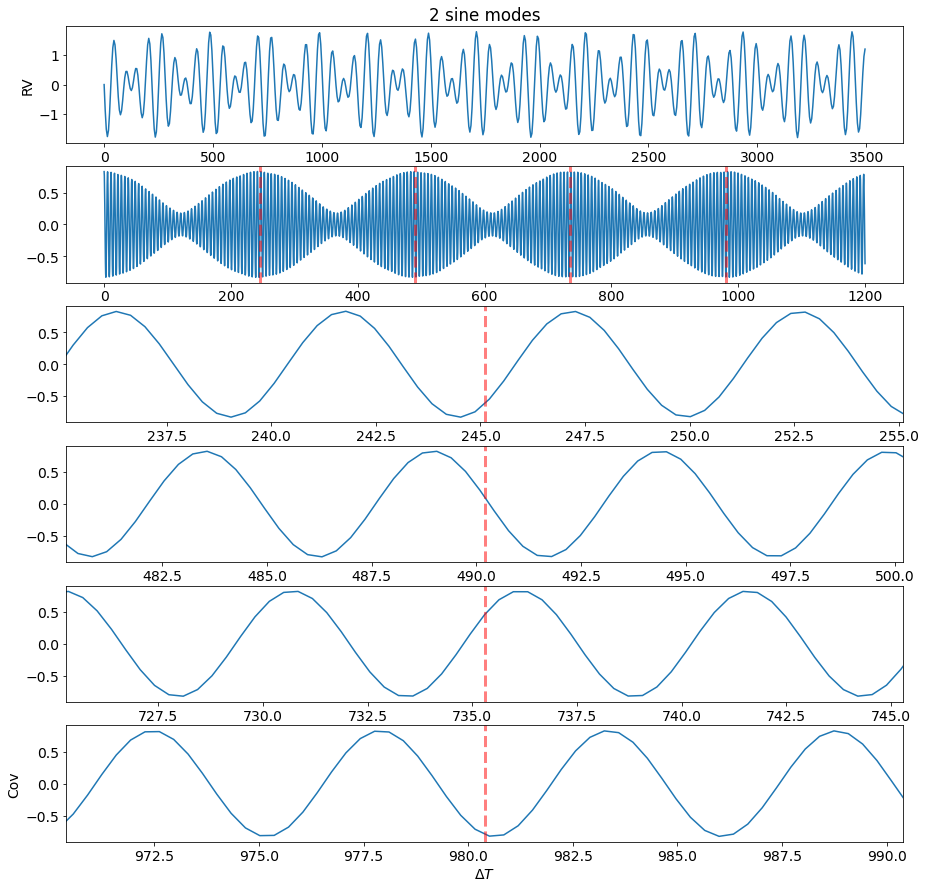

In [122]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(611)
title='2 sine modes'
plt.title(title)
plt.plot(t, y(t))
# plt.plot(t_plot, function2(t_plot))
plt.xlabel('T')
plt.ylabel('RV')

plt.subplot(612)
plt.plot(Delta_t, cov_XY)
plt.axvline(x=1/abs(freq1-freq2)/60, c='r', ls='--', lw=3, alpha=0.5)
plt.axvline(x=1/abs(freq1-freq2)*2/60, c='r', ls='--', lw=3, alpha=0.5)
plt.axvline(x=1/abs(freq1-freq2)*3/60, c='r', ls='--', lw=3, alpha=0.5)
plt.axvline(x=1/abs(freq1-freq2)*4/60, c='r', ls='--', lw=3, alpha=0.5)

plt.subplot(613)
plt.plot(Delta_t, cov_XY)
plt.axvline(x=1/abs(freq1-freq2)/60, c='r', ls='--', lw=3, alpha=0.5)
plt.xlim([1/abs(freq1-freq2)*1/60-10,1/abs(freq1-freq2)*1/60+10])

plt.subplot(614)
plt.plot(Delta_t, cov_XY)
plt.axvline(x=1/abs(freq1-freq2)*2/60, c='r', ls='--', lw=3, alpha=0.5)
plt.xlim([1/abs(freq1-freq2)*2/60-10,1/abs(freq1-freq2)*2/60+10])

plt.subplot(615)
plt.plot(Delta_t, cov_XY)
plt.axvline(x=1/abs(freq1-freq2)*3/60, c='r', ls='--', lw=3, alpha=0.5)
plt.xlim([1/abs(freq1-freq2)*3/60-10,1/abs(freq1-freq2)*3/60+10])

plt.subplot(616)
plt.plot(Delta_t, cov_XY)
plt.axvline(x=1/abs(freq1-freq2)*4/60, c='r', ls='--', lw=3, alpha=0.5)
plt.xlim([1/abs(freq1-freq2)*4/60-10,1/abs(freq1-freq2)*4/60+10])

plt.xlabel(r'$\Delta T$')
plt.ylabel('Cov')

In [61]:
delta_t = 0
X = y[t<(max(t)-delta_t)]
Y, _ = gp.predict(y, t[t<(max(t)-delta_t)]+delta_t, return_var=False)

ValueError: dimension mismatch

In [47]:
print(delta_t)
X = y[t<(max(t)-delta_t)]
X

0.0


array([ 0.        ,  1.4468916 ,  1.09720734, -0.60278522, -1.53659232,
       -0.56697278,  1.07289264,  1.35641946, -0.01872265, -1.31700871,
       -0.96768154,  0.52733387,  1.30755053,  0.48188581, -0.85865608,
       -1.08745551, -0.02428793,  0.97303011,  0.75213949, -0.30564904,
       -0.89879113, -0.41509126,  0.46360113,  0.71691664,  0.16905095,
       -0.46986112, -0.52861186, -0.05608686,  0.39617153,  0.41734324,
        0.05668304, -0.33494889, -0.41862106, -0.10128968,  0.36197476,
        0.50803358,  0.0999679 , -0.50582529, -0.61162181,  0.02052714,
        0.73491183,  0.63486733, -0.28547084, -0.9668434 , -0.50004349,
        0.65794728,  1.09702044,  0.1787004 , -1.04702418, -1.03661878,
        0.29234996,  1.33589296,  0.74675275, -0.81755319, -1.4205703 ,
       -0.2567848 ,  1.26990762,  1.24599279, -0.33991604, -1.5301242 ,
       -0.82708137,  0.91179692,  1.52457819,  0.24736527, -1.32817941,
       -1.2492749 ,  0.36467418,  1.49865397,  0.77171183, -0.87

In [34]:
t[t<(max(t)-delta_t)].shape

(3499,)

In [36]:
Delta_t.shape

(17500, 3500)

In [37]:
t.shape

(3500,)

In [38]:
np.linspace(0, t-10, 5*len(t))

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.71461226e-04, -5.65746614e-04, -5.60032002e-04, ...,
         1.94125379e-02,  1.94182525e-02,  1.94239671e-02],
       [-1.14292245e-03, -1.13149323e-03, -1.12006400e-03, ...,
         3.88250757e-02,  3.88365049e-02,  3.88479342e-02],
       ...,
       [-9.99885708e+00, -9.89886851e+00, -9.79887994e+00, ...,
         3.39661175e+02,  3.39761163e+02,  3.39861152e+02],
       [-9.99942854e+00, -9.89943425e+00, -9.79943997e+00, ...,
         3.39680587e+02,  3.39780582e+02,  3.39880576e+02],
       [-1.00000000e+01, -9.90000000e+00, -9.80000000e+00, ...,
         3.39700000e+02,  3.39800000e+02,  3.39900000e+02]])